In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
#Loading the data file using pandas

data=pd.read_csv("A:/data science/python/project data set/googleplaystore/googleplaystore.csv")

In [3]:
#Check for null values in the data. Getting the number of null values for each column

data.shape
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [4]:
#Drop records with nulls in any of the columns.

data.dropna(inplace=True)
data.drop_duplicates(subset='App',inplace=True)
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

# Fixing the variables with incorrect type and inconsistent formatting



In [5]:
data['Size'].value_counts

<bound method IndexOpsMixin.value_counts of 0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 8190, dtype: object>

In [6]:
#Size column has sizes in Kb as well as Mb. To analyze,converting these to numeric
def change_size(size):
    if size.endswith('M'):
        x = size[:-1]
        x = float(x)*1000
        return(x)
    elif size.endswith('k'):
        x = size[:-1]
        x = float(x)
        return(x)
    else:
        return None



In [7]:

data["Size"] = data["Size"].map(change_size)
data.dropna(inplace=True)

In [8]:
#Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
data['Reviews']=list(map(int,data['Reviews']))

In [9]:
#Installs field is currently stored as string and has values like 1,000,000+.so,removing the  ‘+’, ‘,’ from the field,to
#convert it to integer
data['Installs']=list(map(lambda vlu:vlu.replace('+',''),data['Installs']))
data['Installs']=list(map(lambda vlu:vlu.replace(',',''),data['Installs']))
data['Installs']=list(map(int,data['Installs']))

In [10]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [11]:
#Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

data['Price']=list(map(lambda pri:pri.strip('$'),data['Price']))
data['Price']=list(map(float,data['Price']))



# Sanity checks:

In [12]:
#Average rating should be between 1 and 5 as only these values are allowed on the play store. 
#Droping the rows that have a value outside this range.
data=data[(data['Rating']>=1)|(data['Rating']<=5)]

#Reviews should not be more than installs as only those who installed can review the app. If there are any such records,
#Droping them.
data=data[data['Reviews']<=data['Installs']]

#For free apps (type = “Free”), the price should not be >0. Droping any such rows.
data=data[((data['Type']=='Free') & (data['Price']<=0))|((data['Type']=='Paid') & (data['Price']>0))]

# Performing univariate analysis:

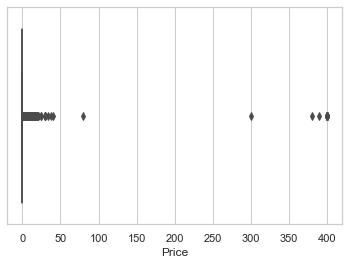

In [13]:
#Boxplot for Price

sns.set(style="whitegrid")
sns.boxplot(x=data["Price"])

In [14]:
#Price seems to have lots of outliers ,most of the apps have very low price ,Only few countable price have very high price

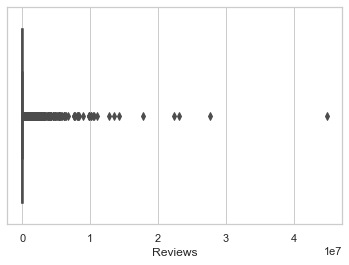

In [15]:
#Boxplot for Reviews

sns.set(style="whitegrid")
sns.boxplot(x=data["Reviews"])

In [16]:
#By seeing the boxplot,Review have outliers and the reviews are high for few countable apps 

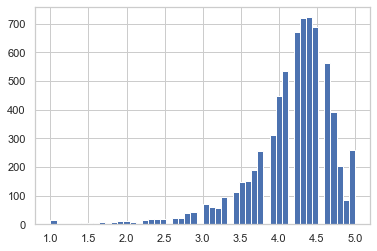

In [17]:
#Histogram for Rating

plt.hist(data['Rating'], bins = 50)
plt.show()

In [18]:
#yes,They are more towards the high rating

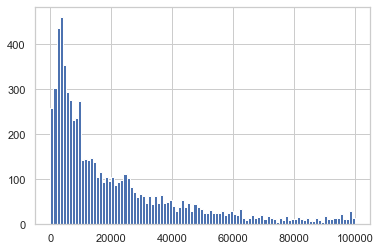

In [19]:
#Histogram for Size

plt.hist(data['Size'], bins = 100)
plt.show()

In [20]:
#From the insights of the plots ,The columns price,review and size have the outliers 

# Outlier treatment:

In [21]:
#Droping apps with prive more than 200,as they most seem to be junk apps
data=data[data['Price']<200]

# Droping records having more than 2 million reviews as to minimize the outliers
data=data[data['Reviews']<=2000000]

In [22]:
#Finding out the different percentiles – 10, 25, 50, 70, 90, 95, 99
print(np.percentile(data['Installs'],10,axis=0))
print(np.percentile(data['Installs'],25,axis=0))
print(np.percentile(data['Installs'],50,axis=0))
print(np.percentile(data['Installs'],70,axis=0))
print(np.percentile(data['Installs'],90,axis=0))
print(np.percentile(data['Installs'],95,axis=0))
print(np.percentile(data['Installs'],99,axis=0))


1000.0
10000.0
100000.0
1000000.0
10000000.0
10000000.0
50000000.0


In [23]:
#droping records having values more than 10000000.0
data=data[data['Installs']<=10000000.0]

# Bivariate analysis:

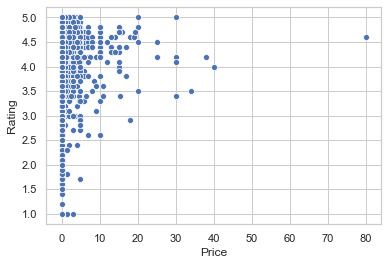

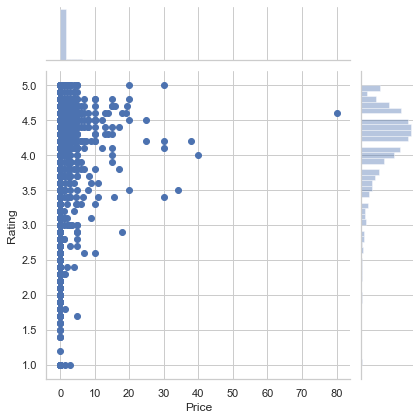

In [24]:
# scatter plot/joinplot for Rating vs Price
sns.scatterplot(x="Price", y="Rating", data=data)

sns.jointplot(x="Price", y="Rating", data=data)
plt.show()

In [25]:
#The rating increases slightly with respect to the Price

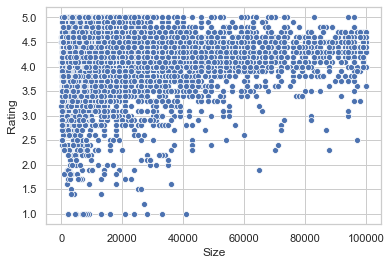

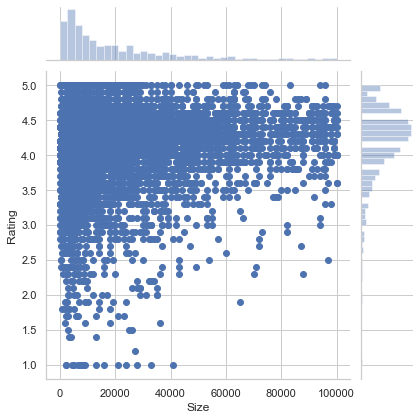

In [26]:
#Scatter plot/joinplot for Size vs Rating
sns.scatterplot(x="Size", y="Rating", data=data)

sns.jointplot(x="Size", y="Rating", data=data)
plt.show()

In [27]:
#From the plot,we infer that the Rating increase with respect to the Size

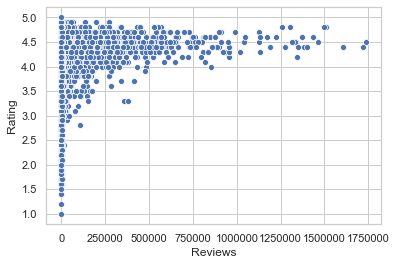

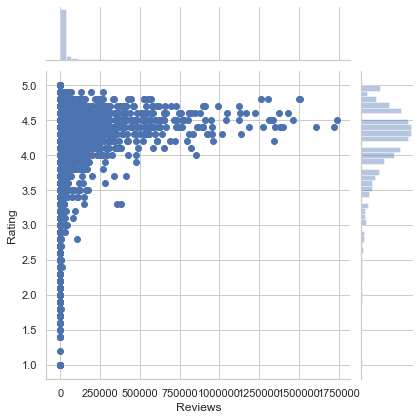

In [28]:
#scatter plot/joinplot for Rating vs. Reviews
sns.scatterplot(x="Reviews", y="Rating", data=data)

sns.jointplot(x="Reviews", y="Rating", data=data)
plt.show()

In [29]:
#From the insights of the plot, we find that the rating of the apps increases with respect to the reviews

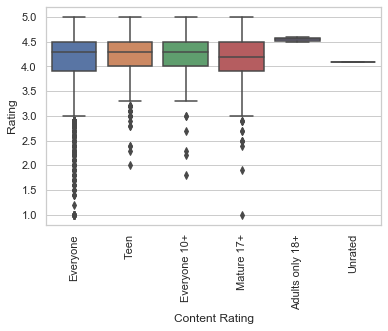

In [30]:
# boxplot for Rating vs. Content Rating

sns.boxplot(x="Content Rating", y="Rating", data=data)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

In [31]:
# The apps with Content Ratings as Everyone and Mature 17+ are liked better by the customers

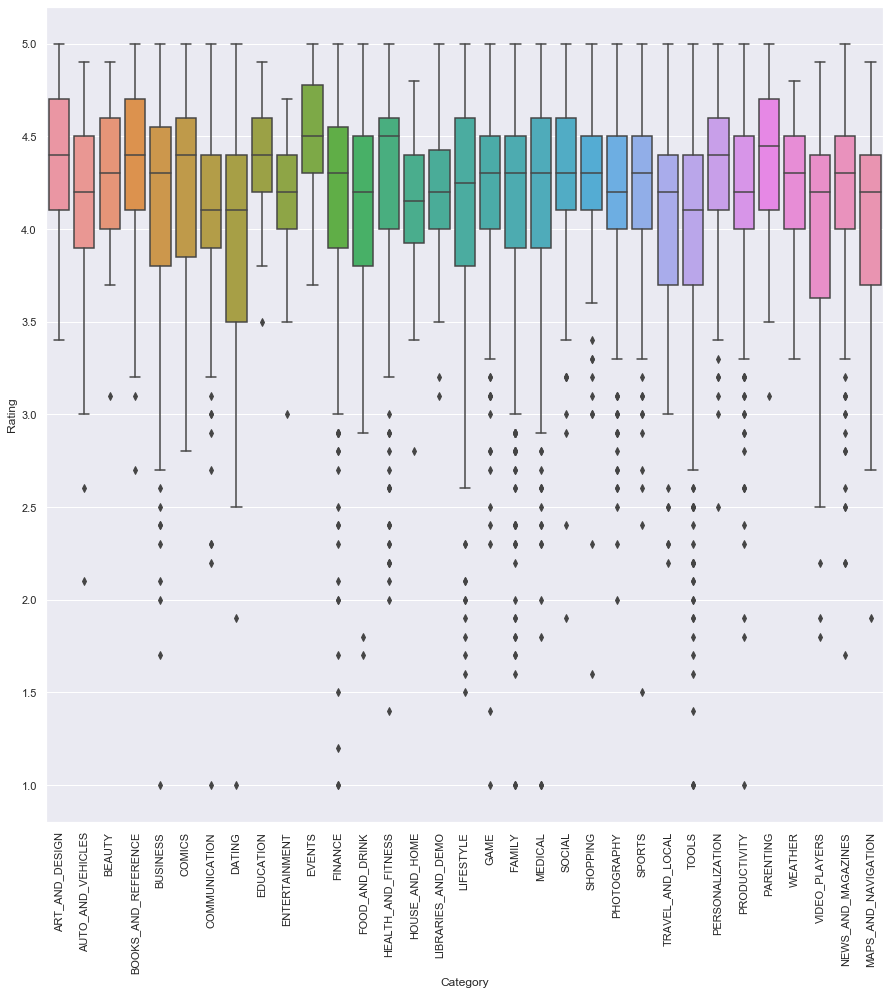

In [32]:
# boxplot for Ratings vs. Category

sns.boxplot(x="Category", y="Rating", data=data)
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(15,15)})
plt.show()

In [33]:
# From the insights of the boxplot we infer that category 'EVENTS' have the best rating among the all 

# Data preprocessing

In [34]:
# creating a copy of the dataframe to make all the edits and Name it as inp1.
inp1=data

In [35]:
# As Reviews and Installs have higher 
inp1['Reviews']=data['Reviews'].apply(np.log1p)
inp1['Installs']=data['Installs'].apply(np.log1p)

In [36]:
# Droping columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
inp1=inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1)

In [37]:
# As the meachine does not understand categorical data ,we do label encoding
inp2=inp1
categorical_var=inp2.dtypes.loc[inp2.dtypes=='object'].index
le=LabelEncoder()
for var in categorical_var:
    inp2[var]=le.fit_transform(inp2[var])

In [38]:
# Spliting the data into df_train and df_test data
df_train=inp2.drop(['Rating'],axis=1)
df_test=inp2['Rating']

In [39]:
# 70-30 split for trainting and testing th data 
x_train,x_test,y_train,y_test=model_selection.train_test_split(df_train,df_test,test_size=0.3,random_state=43)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4744, 8)
(4744,)
(2034, 8)
(2034,)


# Model building

In [40]:
# Applying linear regression for the model 
lin_reg=LinearRegression(n_jobs=-1)
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [41]:
# Intercept and Coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_,x_train.columns)

4.724681849629887
[-2.19075728e-03  1.74833642e-01 -6.04941872e-07 -1.53907592e-01
 -5.96343401e-02 -1.33960383e-03 -1.42207150e-02 -6.05893777e-04] Index(['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')


In [42]:
# R2-value for train data
y_train_pred=lin_reg.predict(x_train)
r2_score(y_train,y_train_pred)

0.11163236736718618

In [43]:
# R2-value for test data
y_test_pred=lin_reg.predict(x_test)
r2_score(y_test,y_test_pred)

0.10021429334194842